In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
pre = "/Users/weilu/Research/server/may_2019/multi_iter0/optimization/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)


In [8]:
multi_iter0 = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/multi_seq_iter0_cutoff600")
original = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/original_gamma")
iter0 = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/iter0_cutoff600")

In [ ]:
total_phis = len(A)
num_decoys = 1000
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=600)

In [9]:
B_filtered_inv = np.linalg.inv(B_filtered)

In [15]:
filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

In [ ]:
filtered_B_inv

In [46]:
c = A_prime.dot(original)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [49]:
np.savetxt("/Users/weilu/Research/server/may_2019/gammas/multi_constraint_tc_constant", gamma_new)

In [5]:
pre = "/Users/weilu/Research/server/may_2019/iteration_optimization/optimization/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)


In [6]:
total_phis = len(A)
num_decoys = 6000
cutoff_mode = 600
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=None)
filtered_B_inv =np.linalg.inv(filtered_B)

495


In [12]:
c = A_prime.dot(original)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [13]:
c

-124.17875324344298

In [14]:
A_prime.dot(gamma_new)

195.6905672407416

In [252]:
np.savetxt(f"{pre}/constant_tc_filtered", gamma_new)

In [293]:
c

-143.5815896253232

In [297]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_2/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)
total_phis = len(A)
num_decoys = 26000
cutoff_mode = None
cutoff_mode = 600
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=cutoff_mode)
filtered_B_inv =np.linalg.inv(filtered_B)


600


In [1]:
c = A_prime.dot(original)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

NameError: name 'A_prime' is not defined

In [301]:
np.savetxt(f"{pre}/cutoff_600", gamma_new)

In [298]:
np.savetxt(f"{pre}/cutoff_646", gamma_new)

In [334]:
pre = "/Users/weilu/Research/server/may_2019/rewrite_phis_computation_reading/optimization/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)
total_phis = len(A)
num_decoys = 28000
cutoff_mode = None
cutoff_mode = 600
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=cutoff_mode)
filtered_B_inv =np.linalg.inv(filtered_B)
c = A_prime.dot(original)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)



600


In [342]:
other_half_B

array([[0.88561, 0.10226, 0.29941, ..., 0.05612, 0.03475, 0.84072],
       [0.10226, 0.0175 , 0.04423, ..., 0.00903, 0.01804, 0.11049],
       [0.29941, 0.04423, 0.14568, ..., 0.02889, 0.03818, 0.30542],
       ...,
       [0.05612, 0.00903, 0.02889, ..., 0.01112, 0.00403, 0.07967],
       [0.03475, 0.01804, 0.03818, ..., 0.00403, 0.05939, 0.08466],
       [0.84072, 0.11049, 0.30542, ..., 0.07967, 0.08466, 1.02317]])

In [340]:
lambda_2

0.9108293058844351

In [303]:
np.savetxt(f"{pre}/cutoff_600", gamma_new)

In [336]:
def getGamma(pre, name, original, cutoff_mode=600):
    A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)
    total_phis = len(A)
    num_decoys = -1
#     cutoff_mode = None
#     cutoff_mode = 600
    filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
                A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=cutoff_mode)
    filtered_B_inv =np.linalg.inv(filtered_B)
    c = A_prime.dot(original)
    B_inv = filtered_B_inv
    lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
    gamma_new = B_inv.dot(A-A_prime*lambda_2)
    return gamma_new


In [309]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
gamma_new = getGamma(pre, name, original)
np.savetxt(f"{pre}/cutoff_600", gamma_new)

600


In [310]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_2_correct/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
gamma_new = getGamma(pre, name, original)
np.savetxt(f"{pre}/cutoff_600", gamma_new)
np.savetxt(f"/Users/weilu/Research/server/may_2019/correct_gammas/iter2_cutoff_600", gamma_new)




/Users/weilu/opt/pyCodeLib.py:2806: ComplexWarning: Casting complex values to real discards the imaginary part
  loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys)**0.5)


600


In [332]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3_correct/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
gamma_new = getGamma(pre, name, original)
np.savetxt(f"{pre}/cutoff_600", gamma_new)
np.savetxt(f"/Users/weilu/Research/server/may_2019/correct_gammas/iter3_cutoff_600", gamma_new)




/Users/weilu/opt/pyCodeLib.py:2806: ComplexWarning: Casting complex values to real discards the imaginary part
  loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys)**0.5)


600


In [333]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_4_correct/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
gamma_new = getGamma(pre, name, original)
np.savetxt(f"{pre}/cutoff_600", gamma_new)
np.savetxt(f"/Users/weilu/Research/server/may_2019/correct_gammas/iter4_cutoff_600", gamma_new)




600


In [339]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_4_correct/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
gamma_new = getGamma(pre, name, original, cutoff_mode=644)
outName = "iter4_cutoff_644_constant_tc"
np.savetxt(f"{pre}/{outName}", gamma_new)
np.savetxt(f"/Users/weilu/Research/server/may_2019/correct_gammas/{outName}", gamma_new)




644


In [311]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_2_correct/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)
total_phis = len(A)
num_decoys = 28000
cutoff_mode = None
cutoff_mode = 600
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=cutoff_mode)
filtered_B_inv =np.linalg.inv(filtered_B)
c = A_prime.dot(original)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)



600


In [315]:
np.dot(A_prime, gamma_new)

-118.67823733672617

In [316]:
np.dot(A_prime, original)

-118.67823733672601

In [330]:
os.path.join("", "123/sdfdfs")

'123/sdfdfs'

In [331]:
os.path.abspath("1235")

'/Users/weilu/opt/notebook/Optimization/1235'

In [328]:
os.path.basename("123/sdfsf/sdfsf")

'sdfsf'

In [321]:
os.path.dirname("./sdfdsf/sdfdf/ss/a")

'./sdfdsf/sdfdf/ss'

In [258]:
cutoff600 = np.loadtxt(f"{pre}/cutoff600")

In [259]:
cutoff600_constant_tc = np.loadtxt(f"{pre}/constant_tc")

In [265]:
constant_tc_filtered_back =  gamma_new

In [253]:
np.std(gamma_new)

2.4122693206546773

In [237]:
np.savetxt(f"{pre}/cutoff600", filtered_gamma)

In [264]:
np.std(gamma_new)

2.4122693206546773

In [263]:
A_prime.dot(gamma_new)

-143.49645242278075

In [267]:
pre = "/Users/weilu/Research/server/may_2019/iter1_optimization/optimization/gammas/"
name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)
total_phis = len(A)
num_decoys = 6000
cutoff_mode = 600
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=None)
filtered_B_inv =np.linalg.inv(filtered_B)


472


In [268]:
c = A_prime.dot(original)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [273]:
np.savetxt(f"{pre}/constant_tc_filtered", gamma_new)

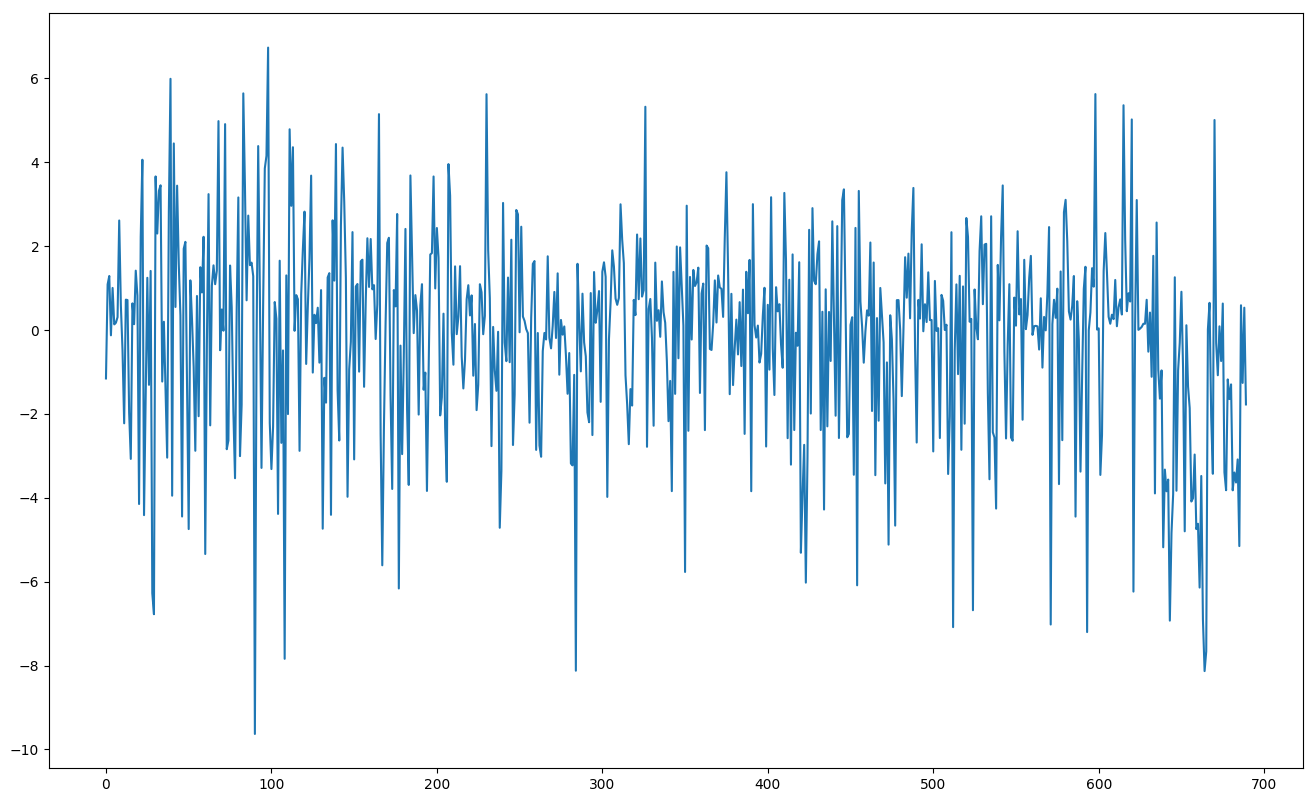

In [272]:
plt.plot(gamma_new)

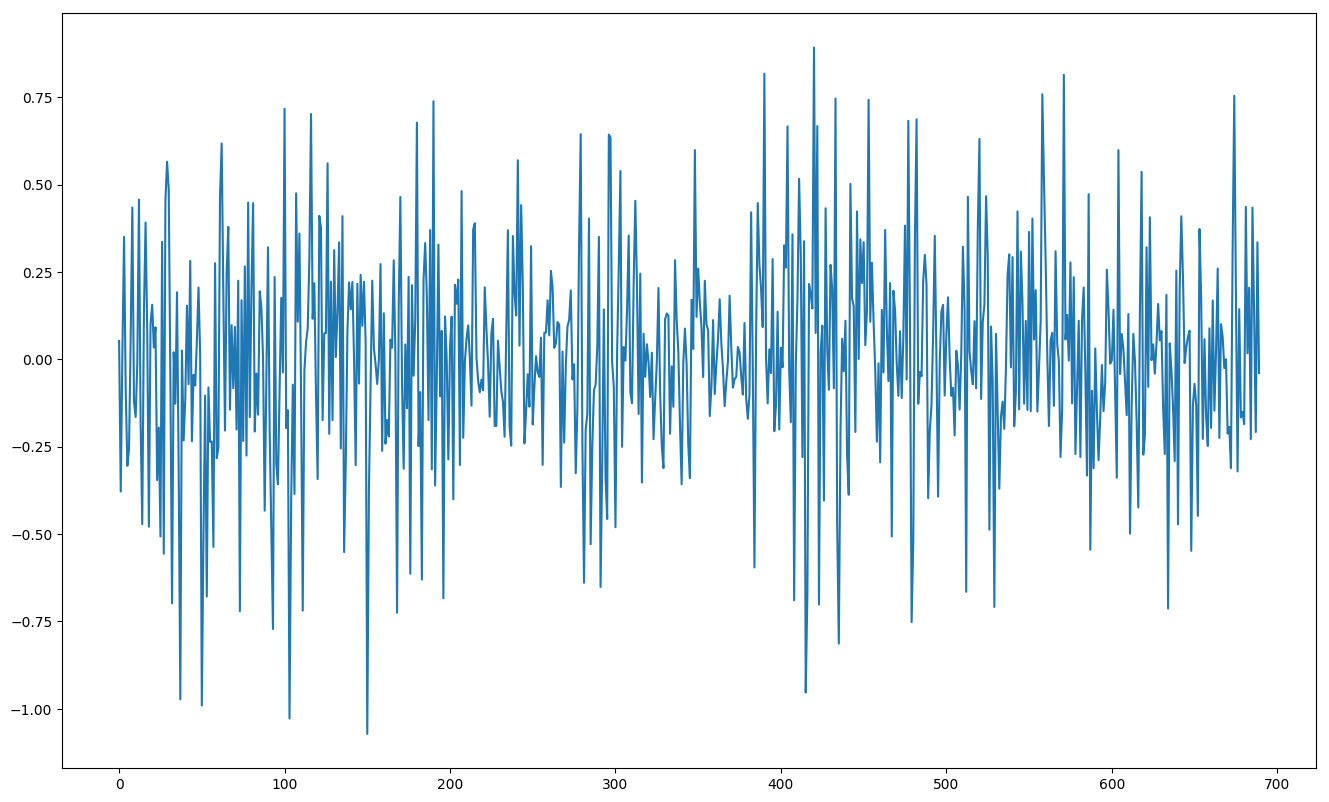

In [270]:
plt.plot(gamma_new-constant_tc_filtered_back)

In [32]:
def get_z(A, B, gamma):
    return A.dot(gamma) / np.sqrt( gamma.dot(B).dot(gamma) )

In [33]:
get_z(A,B, original)

4.395583733467619

In [34]:
get_z(A,B, multi_iter0)

6.116852022700324

In [35]:
get_z(A,B, gamma_new)

6.080763283269507

In [36]:
np.mean(gamma_new)

-0.14831059834650018

In [37]:
np.mean(original)

-0.11829680821739127

In [38]:
np.mean(multi_iter0)

-0.024171825275566463

In [8]:
B_inv = np.linalg.inv(B)

In [5]:
np.std(original)

0.4362224236601442

In [6]:
np.std(multi_iter0)

0.23961197636143594

In [7]:
multi_iter0_scaled = multi_iter0 * np.std(original)/np.std(multi_iter0)

In [ ]:
A.dot(B_inv)

In [86]:
constraint = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/contraint_filtered")

In [87]:
A_prime.dot(constraint)

37.29159649105659

In [88]:
A.dot(constraint)

37.2915964910568

In [102]:
A_prime.dot(iter0)

-5.054703704092489

In [97]:
A_prime.dot(original)

-146.15712390919882

In [91]:
A_prime.dot(multi_iter0)

-7.3201396931921225

In [98]:
multi_iter0_A_norm = multi_iter0 * A_prime.dot(original) / A_prime.dot(multi_iter0)

In [99]:
A_prime.dot(multi_iter0_A_norm)

-146.1571239091988

In [100]:
np.savetxt("/Users/weilu/Research/server/may_2019/gammas/multi_iter0_A_norm", multi_iter0_A_norm)

In [83]:
A.dot(original)

56.10769641633409

In [115]:
A.dot(original)  / np.sqrt( original.dot(B).dot(original) )

4.352314366642366

In [114]:
A.dot(multi_iter0)  / np.sqrt( multi_iter0.dot(B).dot(multi_iter0) )

6.108918204419083

In [108]:
original.dot(B).dot(original)

166.18979929050482

In [110]:
multi_iter0.dot(B).dot(multi_iter0)

37.31888162828287

In [84]:
A.dot(multi_iter0)

37.31888162828287

In [20]:
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A)-A.dot(B_inv).dot(A))/(A_prime.dot(B_inv).dot(A_prime)-A.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [21]:
lambda_2

-0.0037274066301556754

In [22]:
A_prime.dot(gamma_new)

37.291596491056765

In [18]:
B_inv = np.linalg.inv(B)
lambda_2 = (A_prime.dot(B_inv).dot(A)-A.dot(B_inv).dot(A))/(A_prime.dot(B_inv).dot(A_prime)-A.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [19]:
lambda_2

-0.0018883242129386676

In [63]:
np.savetxt(f"{pre}contraint", gamma_new)

600


In [65]:
B = filtered_B
B_inv = np.linalg.inv(B)
lambda_2 = (A_prime.dot(B_inv).dot(A)-A.dot(B_inv).dot(A))/(A_prime.dot(B_inv).dot(A_prime)-A.dot(B_inv).dot(A_prime))
gamma_new_filtered = B_inv.dot(A-A_prime*lambda_2)

In [66]:
np.savetxt(f"{pre}contraint_filtered", gamma_new_filtered)

In [76]:
original_normalized = original * np.std(multi_iter0) / np.std(original)

In [79]:
np.savetxt("/Users/weilu/Research/server/may_2019/gammas/original_gamma_normalized", original_normalized)

In [77]:
original_normalized[:10]

array([-0.39553169,  0.1484672 ,  0.14263925,  0.22093483, -0.34085002,
        0.13440541,  0.19143255,  0.06256946,  0.06872149, -0.54928854])

In [70]:
(multi_iter0-gamma_new_filtered).shape

(690,)

In [71]:
np.sum(multi_iter0-gamma_new_filtered)/690

-0.03988883960386629

In [72]:
np.mean(gamma_new_filtered)

0.015717014328299826

In [73]:
np.std(gamma_new_filtered)

0.24324945369182

In [62]:
np.sum(Gamma-gamma_new)

-113.62016145290295

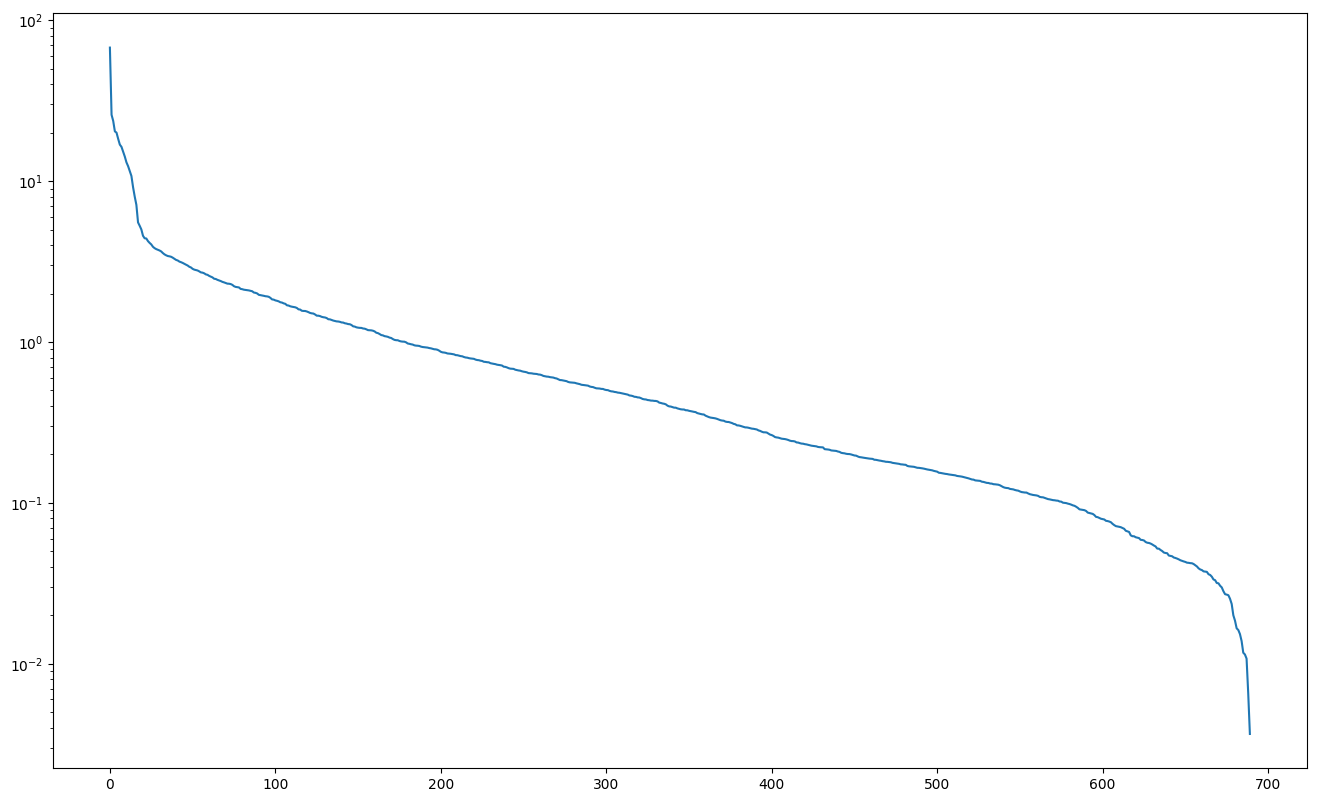

In [15]:
plt.plot(Lamb)
plt.yscale("log")

In [6]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys)

15


In [8]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=600)

600


In [7]:
np.sum(filtered_gamma-Gamma_filtered)

(-1.5343756645042322e-05+0j)

In [9]:
np.sum(filtered_gamma-Gamma_filtered)

(-16.43989944014086+0j)

In [17]:
original = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/original_gamma")

In [24]:
multi_iter0 = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/cutoff600")

In [27]:
np.std(original[:630])

0.40883096718693446

In [28]:
np.mean(original[:630])

-0.06386869841269842

In [18]:
np.std(original)

0.4362224236601442

In [19]:
np.mean(original)

-0.11829680821739127

In [25]:
np.std(multi_iter0)

0.23961197636143594

In [26]:
np.mean(multi_iter0)

-0.024171825275566463

In [29]:
np.std(multi_iter0[:630])

0.21554206217956784

In [30]:
np.mean(multi_iter0[:630])

-0.021580880614021258

In [10]:
np.savetxt(pre+"cutoff600", filtered_gamma)

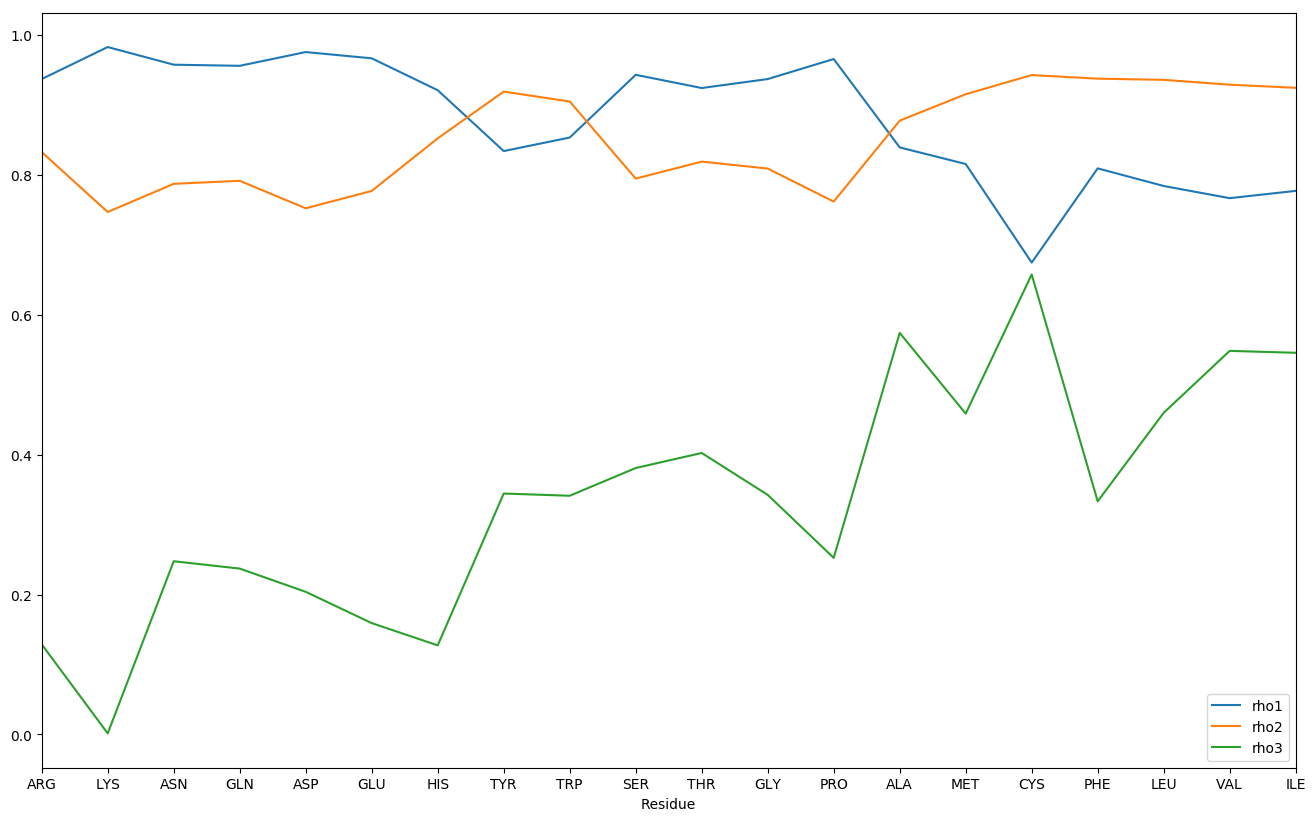

In [47]:
b = formatBurialGamma(original[630:])
b.plot(x="Residue", y=["rho1", "rho2", "rho3"])
_ = plt.xticks(np.arange(20), b.Residue)

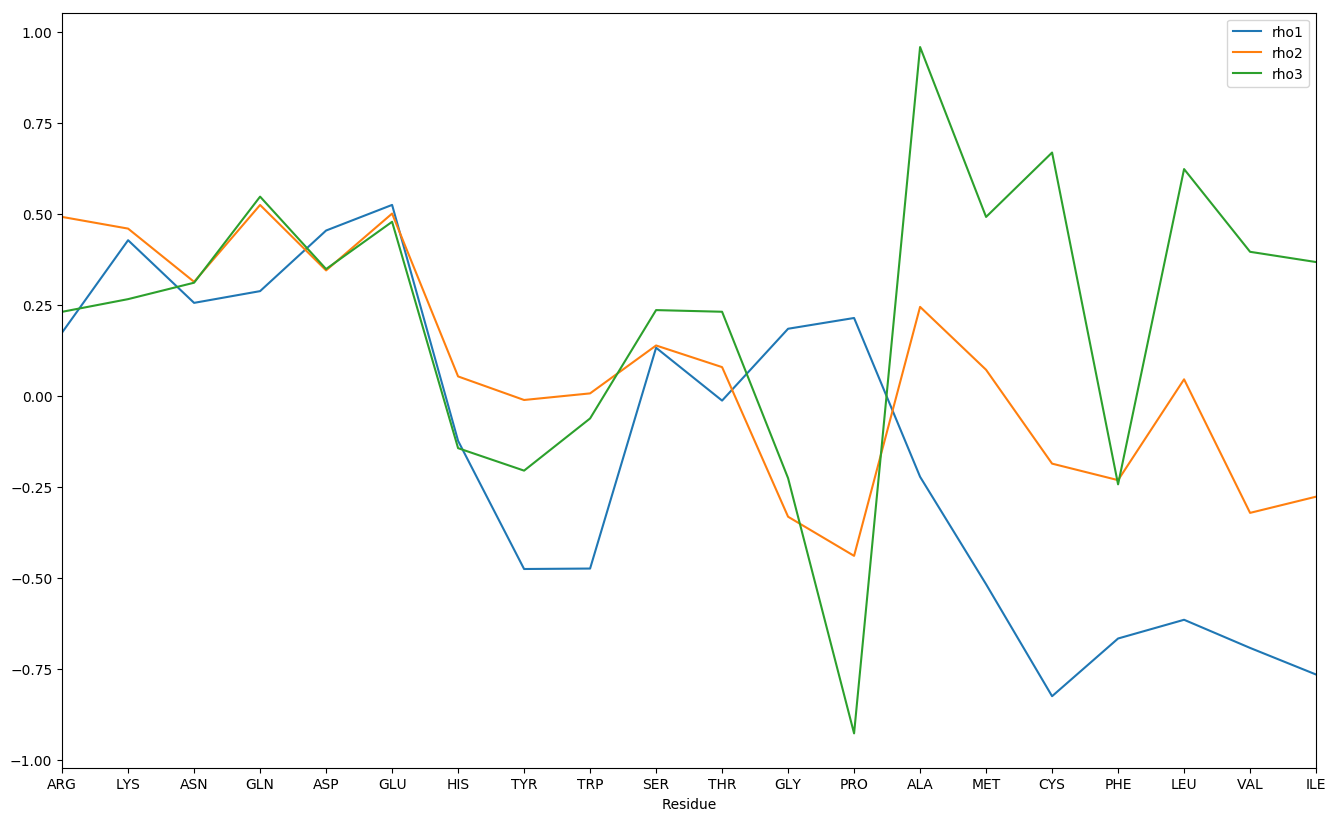

In [46]:
b = formatBurialGamma(multi_iter0[630:])
b.plot(x="Residue", y=["rho1", "rho2", "rho3"])
_ = plt.xticks(np.arange(20), b.Residue)

In [42]:
locs

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ])

In [43]:
labels

<a list of 9 Text xticklabel objects>

In [33]:
def formatBurialGamma(burialGamma):
    # now, positive means favored.
    rhoGamma = pd.DataFrame(-burialGamma.reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
    rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
    rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
    rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
    g = rhoGamma[["rho1", "rho2", "rho3"]].values
    # np.savetxt("/Users/weilu/Research/server/feb_2019/burial_only_gamma.dat", g, fmt='%7.4f')
    # rhoGamma
    rhoGamma["hydrophobicityOrder"] = rhoGamma["oneLetter"].apply(lambda x: hydrophobicity_map[x])
    return rhoGamma.sort_values("hydrophobicityOrder")

In [34]:
formatBurialGamma(multi_iter0[630:])

,Residue,rho1,rho2,rho3,index,oneLetter,hydrophobicityOrder
1,ARG,0.173991,0.491560,0.230882,1,R,0
11,LYS,0.427581,0.459441,0.265724,11,K,1
2,ASN,0.255475,0.313293,0.310847,2,N,2
5,GLN,0.287714,0.524375,0.547292,5,Q,3
3,ASP,0.454170,0.344617,0.348379,3,D,4
6,GLU,0.524553,0.500806,0.478181,6,E,5
8,HIS,-0.123574,0.053381,-0.143666,8,H,6
18,TYR,-0.475598,-0.011315,-0.205349,18,Y,7
17,TRP,-0.474360,0.006821,-0.062025,17,W,8
15,SER,0.132154,0.138412,0.235605,15,S,9


In [31]:
# now, positive means favored.
ga = multi_iter0[630:]
rhoGamma = pd.DataFrame(-ga.reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/burial_only_gamma.dat", g, fmt='%7.4f')
# rhoGamma
rhoGamma["hydrophobicityOrder"] = rhoGamma["oneLetter"].apply(lambda x: hydrophobicity_map[x])
rhoGamma.sort_values("hydrophobicityOrder")

,Residue,rho1,rho2,rho3,index,oneLetter,hydrophobicityOrder
1,ARG,0.173991,0.491560,0.230882,1,R,0
11,LYS,0.427581,0.459441,0.265724,11,K,1
2,ASN,0.255475,0.313293,0.310847,2,N,2
5,GLN,0.287714,0.524375,0.547292,5,Q,3
3,ASP,0.454170,0.344617,0.348379,3,D,4
6,GLU,0.524553,0.500806,0.478181,6,E,5
8,HIS,-0.123574,0.053381,-0.143666,8,H,6
18,TYR,-0.475598,-0.011315,-0.205349,18,Y,7
17,TRP,-0.474360,0.006821,-0.062025,17,W,8
15,SER,0.132154,0.138412,0.235605,15,S,9


In [ ]:
data = pd.read_csv("/Users/weilu/Research/server/april_2019/optimization_mult_seq/data_info_3.csv", index_col=0)

In [6]:
data.query("Problematic != 4").reset_index(drop=True)

,Name,FullName,SeqLength,Length,Seq,Problematic
0,1VBHA,1VBHA_518-876,359,359,PALSGDLGTFMAWVDDVRKLKVLANADTPDDALTARNNGAQGIGLC...,0
1,1K1GA,1K1GA_137-224,88,88,SDKVMIPQDEYPEINFVGLLIGPRGNTLKNIEKECNAKIMIRGKGS...,0
2,3OHBA,3OHBA_385-512,128,128,PLSSRPVVKSMMSNKNLRGKSCNSIVDCISWLEVFCAELTSRIQDL...,0
3,2IVXA,2IVXA_8-148,141,141,SSRWFFTREQLENTPSRRCGVEADKELSCRQQAANLIQEMGQRLNV...,0
4,3IKKB,3IKKB_7-113,107,107,VLSLEPQHELKFRGPFTDVVTTNLKLGNPTDRNVCFKVKTTAPRRY...,0
5,2YTUA,2YTUA_22-106,85,85,PPNMTTNERRVIVPADPTLWTQEHVRQWLEWAIKEYSLMEIDTSFF...,0
6,2HR3D,2HR3D_33-100,68,63,VQFSQLVVLGAIDRLGGDVTPSELAAAERRSSNLAALLRELERGGL...,1
7,2P3HA,2P3HA_8-102,95,95,TETSPDKWLIDGDTPLDEVERAIGYELPEGDYETISGLLFDHANAL...,0
8,1X4UA,1X4UA_8-78,71,71,RYPTNNFGNCTGCSATFSVLKKRRSCSNCGNSFCSRCCSFKVPKSS...,0
9,4IHCH,4IHCH_135-391,257,237,EVEDNIRARMEEGYQYVRCQMGMYGGPKRSPRSKTPGIYFDPEAYA...,1


In [8]:
complete_data_filtered = data.query("Problematic != 4").reset_index(drop=True)
to_location = "/Users/weilu/Research/server/april_2019/optimization_mult_seq_2/"
n = len(complete_data_filtered)
number_of_runs = int(np.ceil(n/5))
perRun = 5
count = 0
for i in range(number_of_runs):
    with open(to_location+f"proteins_name_list/proteins_name_list_{i}.txt", "w") as out:
        cc = 0
        while count < n and cc < perRun:
            fullName = complete_data_filtered.iloc[count]["FullName"]
            out.write(fullName+"\n")
            cc += 1
            count += 1
print(number_of_runs)

In [1]:
362*5

1810

In [9]:
number_of_runs

362

In [10]:
-1 == [-1,2]

False

In [48]:
multi = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/multi_seq_iter0_cutoff600")

In [49]:
original = np.loadtxt("/Users/weilu/Research/server/may_2019/gammas/original_gamma")

In [50]:
np.std(original)

0.4362224236601442

In [53]:
normalized_multi = multi * np.std(original) /np.std(multi)

In [54]:
np.std(normalized_multi)

0.43622242366014424

In [56]:
np.savetxt("/Users/weilu/Research/server/may_2019/gammas/multi_seq_iter0_cutoff600_normalized", normalized_multi)

In [79]:
len(data)

1723

In [216]:
len(data)

1688

In [227]:
def get_MSA_data(a3mFile):
    data = []
    # "/Users/weilu/Research/server/may_2019/family_fold/aligned/1r69.a3m"
    with open(a3mFile, "r") as f:
        for line in f:
            if line[0] == ">":
                continue
            s_new = ""
            seq = line.strip()
            for s in seq:
                if s.islower():
                    continue
                s_new += s
            data.append(s_new)
    return data
gamma_ijm, water_gamma_ijm, protein_gamma_ijm = get_gammas("/Users/weilu/opt/parameters/globular_parameters/gamma.dat", memGammaFile=None)
burial_gamma = np.loadtxt("/Users/weilu/opt/parameters/globular_parameters/burial_gamma.dat")
def get_ff_dat(data, location=None):
    n = len(data[0])
    f_direct = np.zeros((n,n))
    f_water = np.zeros((n,n))
    f_protein = np.zeros((n,n))
    f_burial = np.zeros((n,3))
    for i in range(n):
        for j in range(i+1, n):
            direct = []
            water = []
            protein = []
            for seq in data:
                # seq = data[0]
                if seq[i] == "-" or seq[j] == "-":
                    continue
                if seq[i] == "X" or seq[j] == "X":
                    continue
                res1type = res_type_map[seq[i]]
                res2type = res_type_map[seq[j]]
                direct.append(gamma_ijm[0][res1type][res2type]) 
                water.append(water_gamma_ijm[0][res1type][res2type])
                protein.append(protein_gamma_ijm[0][res1type][res2type])
            f_direct[i][j] += np.average(direct)
            f_water[i][j] += np.average(water)
            f_protein[i][j] += np.average(protein)

            f_direct[j][i] += np.average(direct)
            f_water[j][i] += np.average(water)
            f_protein[j][i] += np.average(protein)

    for i in range(n):
        for j in range(3):
            burial = []
            for seq in data:
                if seq[i] == "-" or seq[i] == "X":
                    continue
                res1type = res_type_map[seq[i]]
                burial.append(burial_gamma[res1type][j])
            f_burial[i][j] += np.average(burial)
    if location:
        np.savetxt(location+"/direct.dat", f_direct)
        np.savetxt(location+"/water.dat", f_water)
        np.savetxt(location+"/protein.dat", f_protein)
        np.savetxt(location+"/burial.dat", f_burial)
    return f_direct, f_water, f_protein, f_burial

In [155]:
name = "1r69"
a3mFile = f"/Users/weilu/Research/server/may_2019/family_fold/aligned/{name}.a3m"
pre = f"/Users/weilu/Research/server/may_2019/family_fold/ff_contact/{name}/"
os.system(f"mkdir -p {pre}")
data = get_MSA_data(a3mFile)
print(name, len(data))
f_direct_2, f_water_2, f_protein_2, f_burial_2 = get_ff_dat(data, location=pre)

In [157]:
a = np.loadtxt("/Users/weilu/Research/server/may_2019/family_fold/data_9.info")

In [165]:
wham = pd.read_csv("/Users/weilu/Research/server/may_2019/family_fold/original_1r69_9/wham.dat")
energy = pd.read_csv("/Users/weilu/Research/server/may_2019/family_fold/original_1r69_9/energy.dat")
wham.columns = wham.columns.str.strip()
remove_columns = ['Tc', 'Energy']
wham = wham.drop(remove_columns, axis=1)
energy.columns = energy.columns.str.strip()
remove_columns = ['Steps', 'Shake', 'Excluded', 'Helix', 'AMH-Go', 'Vec_FM', 'SSB']
energy = energy.drop(remove_columns, axis=1)
data = pd.concat([wham, energy], axis=1)

In [168]:
data["newContact"] = a[:,2]

In [177]:
data.Qw.dtype

dtype('float64')

In [171]:
data.columns

Index(['Steps', 'Qw', 'Rg', 'Chain', 'Chi', 'Rama', 'DSSP', 'P_AP', 'Water',
       'Burial', 'Frag_Mem', 'Membrane', 'VTotal', 'Ebond', 'Epair',
       'newContact'],
      dtype='object')

In [ ]:
g = sns.FacetGrid(a, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())

In [187]:
# cmap = sns.cubehelix_palette(as_cmap=True)
# fg = sns.FacetGrid(data=data, hue='Qw', palette=cmap)
# g = (fg.map(plt.scatter, 'newContact', 'Water').add_legend())

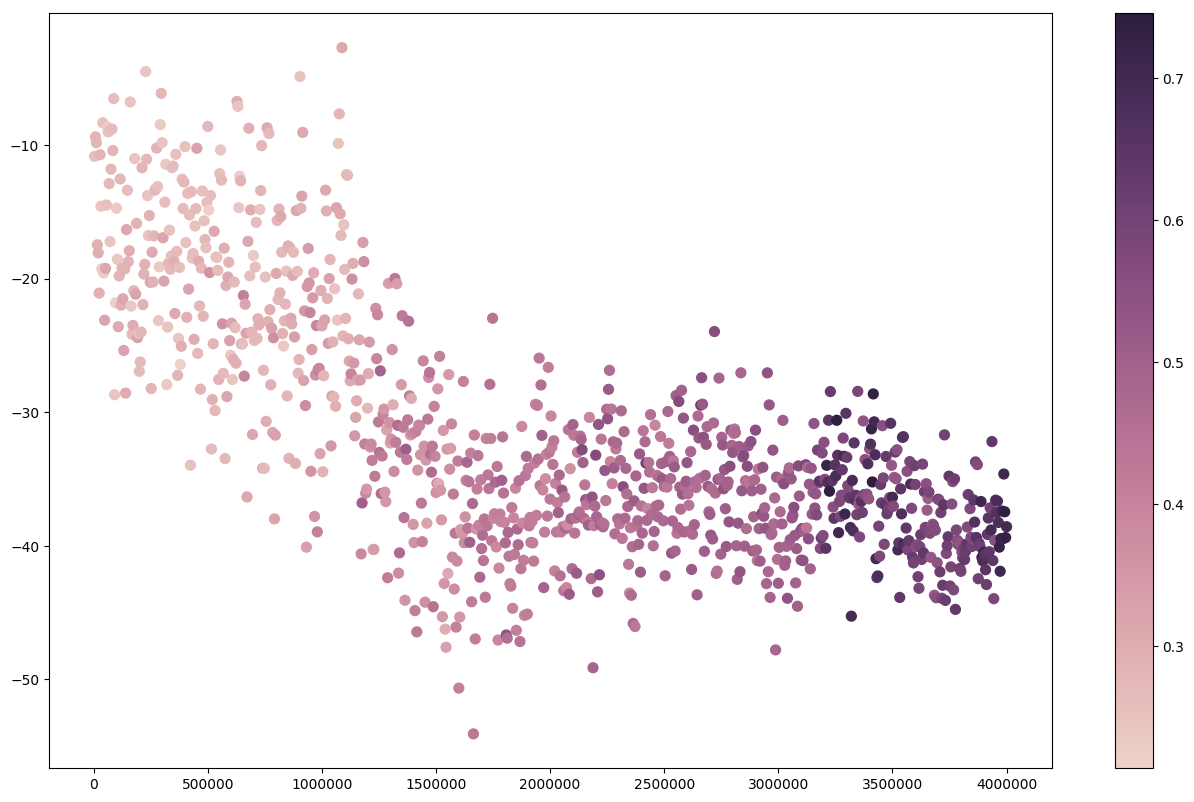

In [197]:

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
# ax.set_aspect(1)
points = ax.scatter(data["Steps"], data["Water"], c=data["Qw"], s=50, cmap=cmap)
f.colorbar(points)

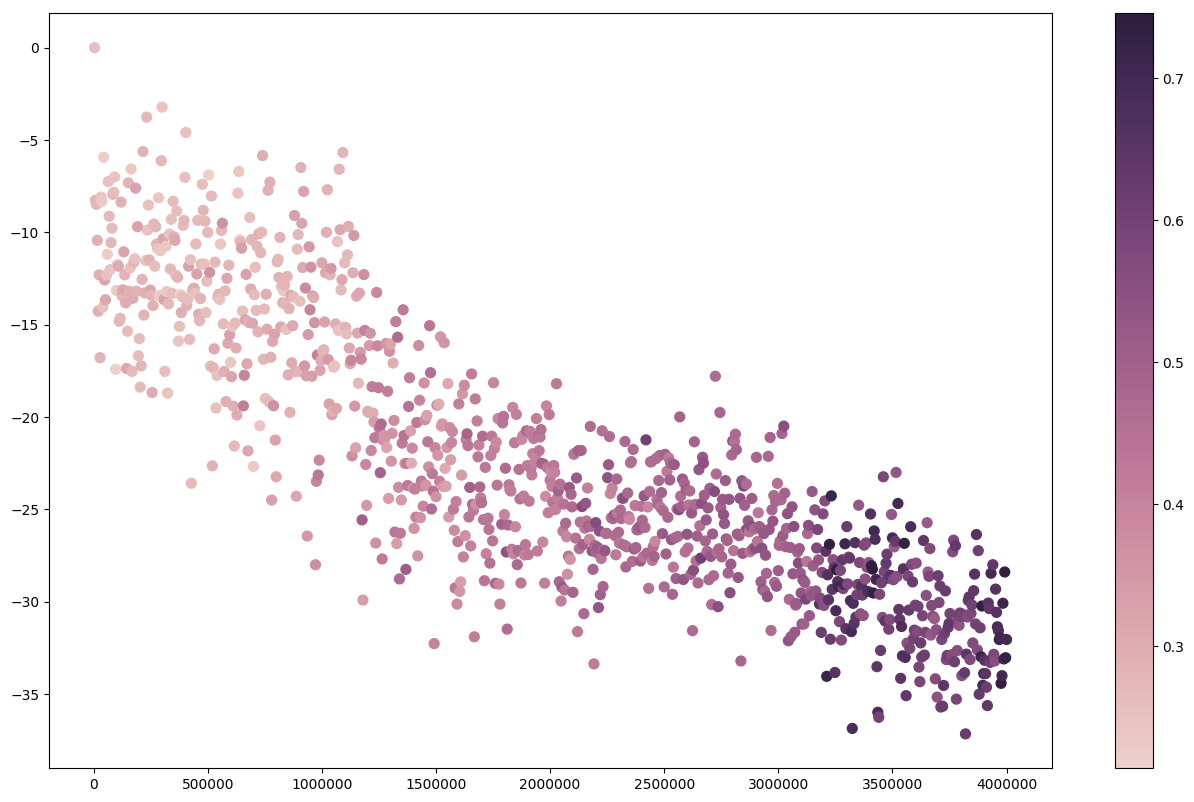

In [198]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
# ax.set_aspect(1)
points = ax.scatter(data["Steps"], data["newContact"], c=data["Qw"], s=50, cmap=cmap)
f.colorbar(points)

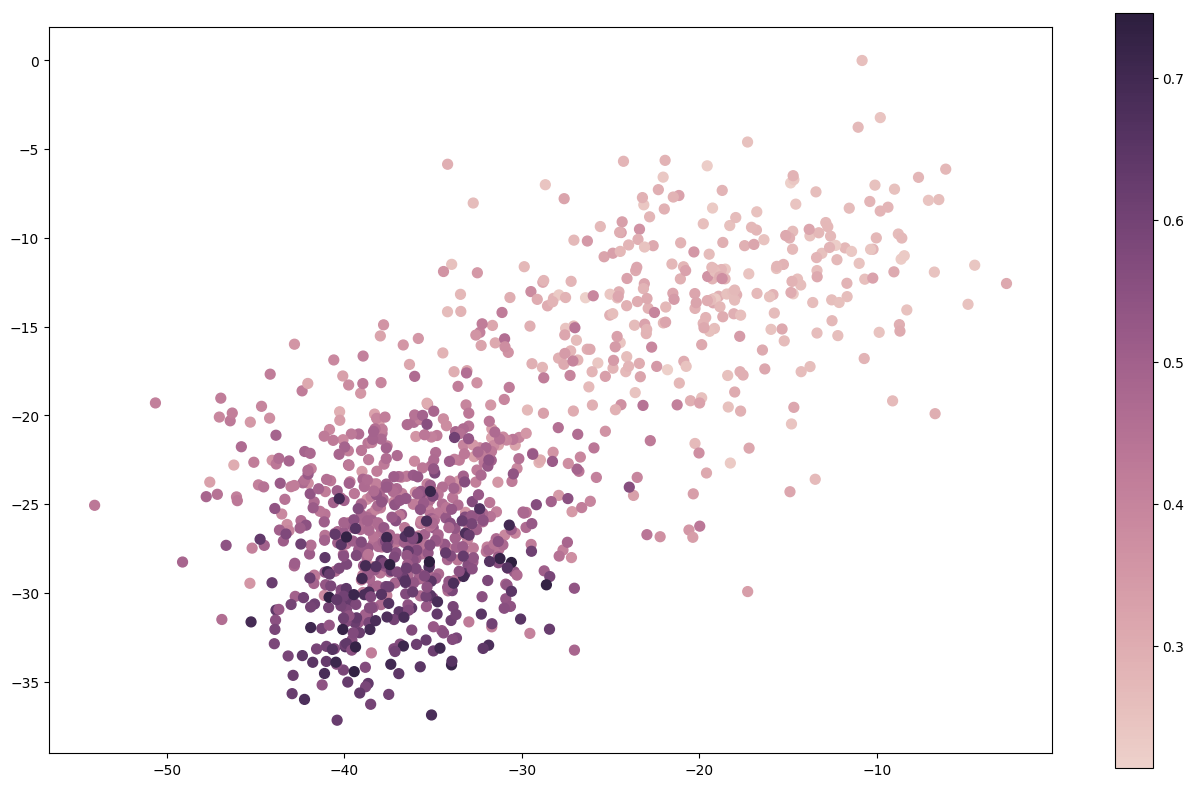

In [195]:

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
ax.set_aspect(1)
points = ax.scatter(data["Water"], data["newContact"], c=data["Qw"], s=50, cmap=cmap)
f.colorbar(points)

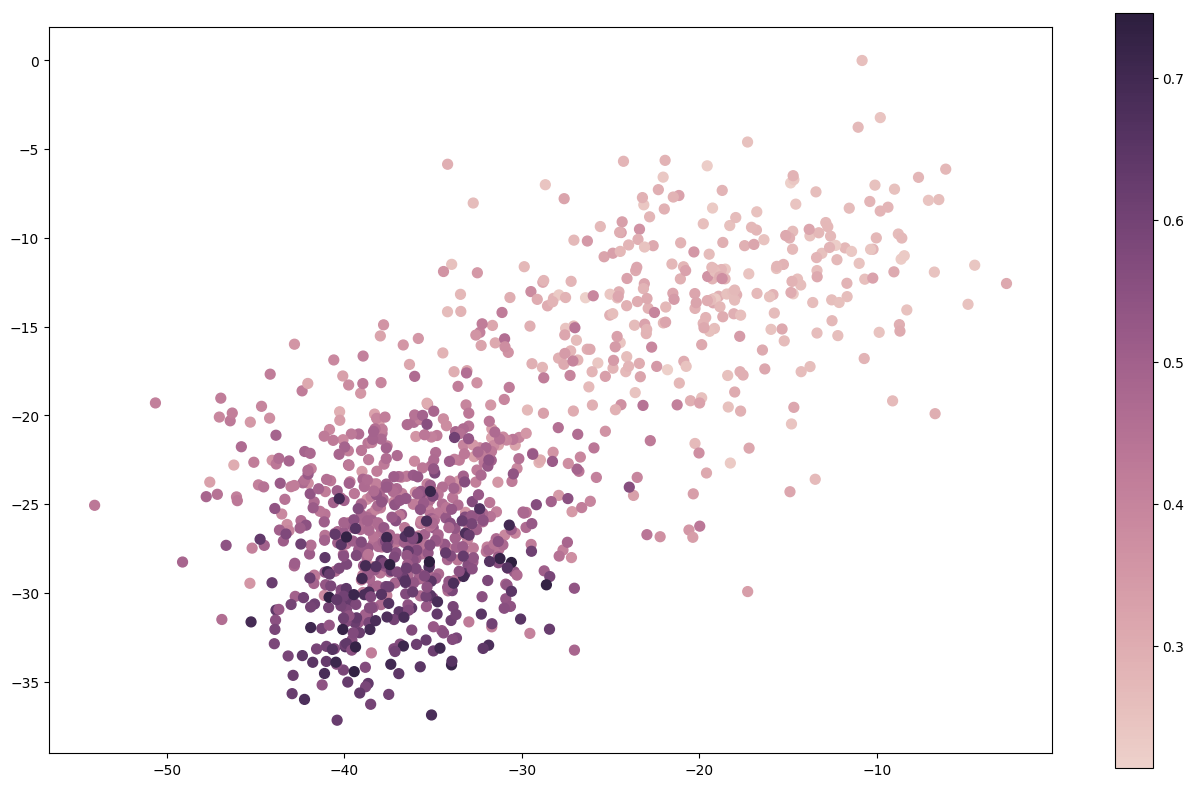

In [191]:

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()

points = ax.scatter(data["Water"], data["newContact"], c=data["Qw"], s=50, cmap=cmap)
f.colorbar(points)
ax.set_aspect('equal')

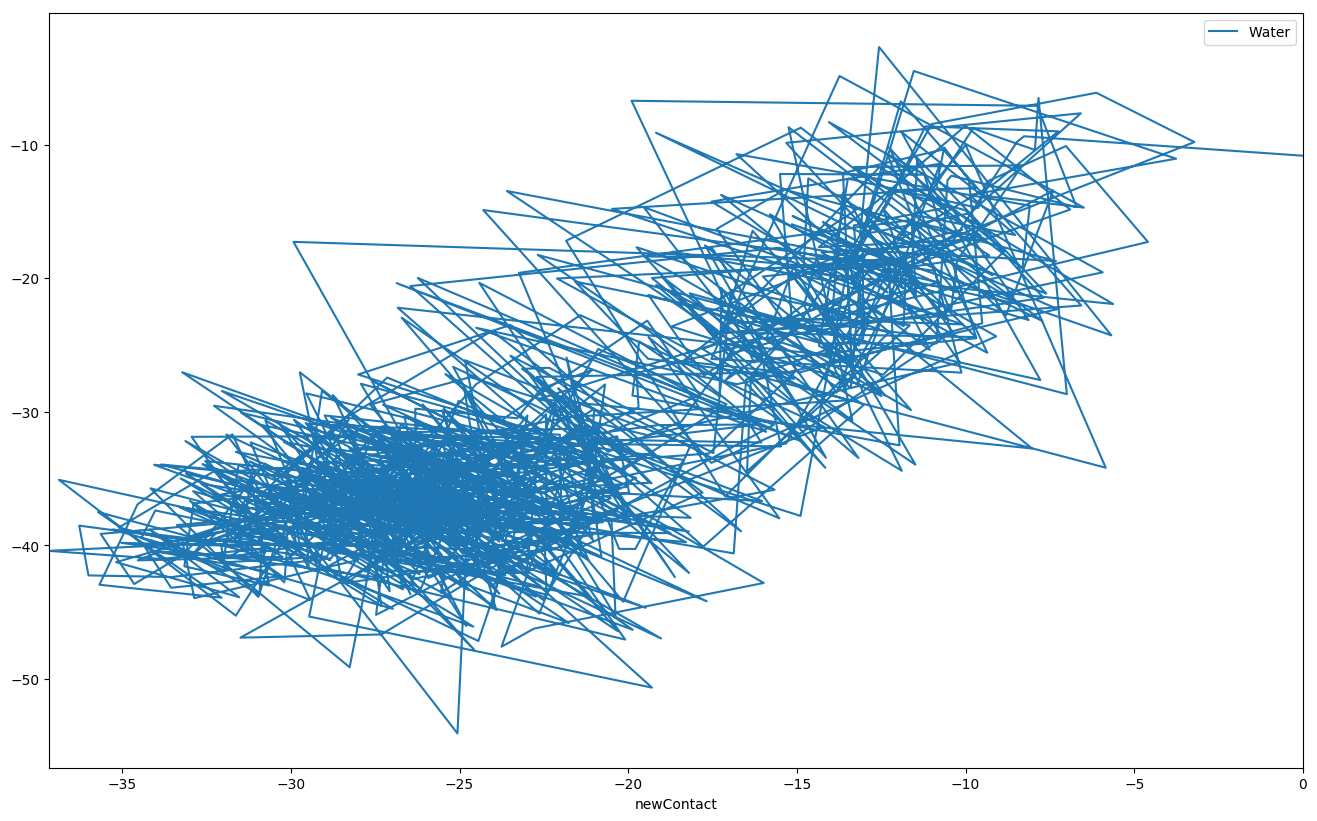

In [174]:
data.plot("newContact", "Water", )

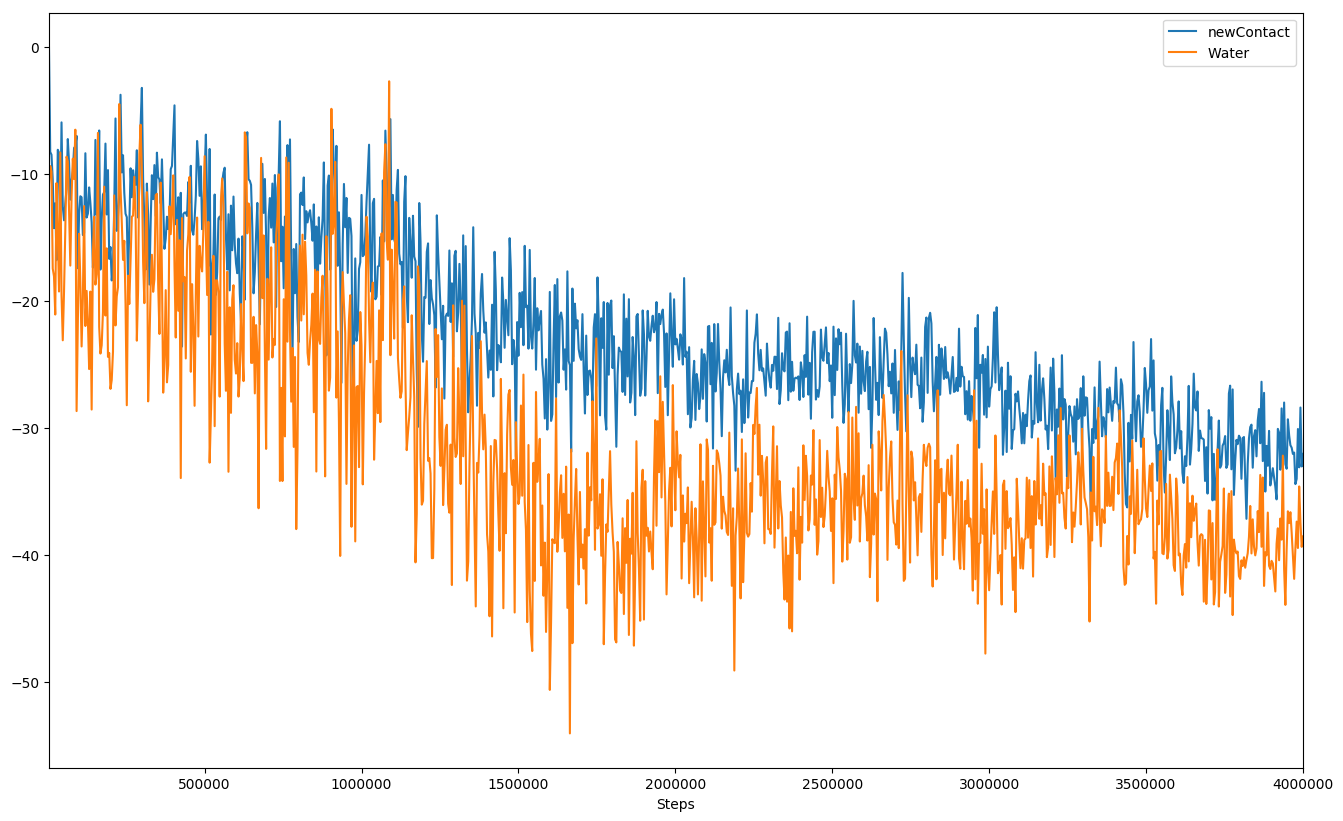

In [172]:
data.plot("Steps", ["newContact", "Water"])

In [158]:
a.shape

(1000, 3)

In [125]:
a.columns

Index(['i', ' j', ' Distance'], dtype='object')

In [114]:
np.average([1,2])

1.5

In [100]:
res_type_map["S"]

15

In [ ]:
# s.islower
# seq = data[0]
# s_new = ""
# for s in seq:
#     if s.islower():
#         continue
#     s_new += s
# print(s_new, len(s_new))
# data = []
# with open("/Users/weilu/Research/server/may_2019/family_fold/aligned/1r69.a3m", "r") as f:
#     for line in f:
#         if line[0] == ">":
#             continue
#         s_new = ""
#         seq = line.strip()
#         for s in seq:
#             if s.islower():
#                 continue
#             s_new += s
#         data.append(s_new)

In [ ]:
data = []
with open("/Users/weilu/Research/server/may_2019/family_fold/query2.a3m", "r") as f:
    for line in f:
        if line[0] == ">":
            continue
        data.append(line.strip())
        
with open("/Users/weilu/Research/server/may_2019/family_fold/query2.aligned", "w") as out:
    for seq in data:
        s_new = ""
        for s in seq:
            if s.islower():
                continue
            s_new += s
        out.write(s_new+"\n")
        # print(s_new, len(s_new))
a = pd.read_csv("/Users/weilu/Research/server/may_2019/family_fold/contact.csv")
b = a.pivot(index="i", columns=" j", values=" Distance").values
plt.imshow(b < 8)











